In [ ]:
# 1. IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# 2. DATA LOADING AND INITIAL EXPLORATION
# Load the dataset
df = pd.read_csv('Career_Switch_Prediction_Dataset.csv')

In [ ]:
print(f"Total number of data points in original dataset: {len(df)}")

Total number of data points in original dataset: 5000


In [ ]:
import pandas as pd
from tabulate import tabulate

# Define variable descriptions (customize for your dataset)
variable_descriptions = {
    "Variable Name": [
        "city", "city_development_index", "gender", "relevent_experience",
        "enrolled_university", "education_level", "major_discipline",
        "experience", "company_size", "company_type", "last_new_job",
        "training_hours", "will_change_career"
    ],
    "Role": ["Feature"] * 12 + ["Target"],
    "Type": [
        "Categorical", "Continuous", "Categorical", "Binary",
        "Categorical", "Ordinal", "Categorical",
        "Ordinal", "Categorical", "Categorical", "Ordinal",
        "Continuous", "Binary"
    ],
    "Description": [
        "City where the candidate resides",
        "Development index of the city (0-1 scale)",
        "Gender of the candidate",
        "Has relevant work experience (Yes/No)",
        "Current university enrollment status",
        "Highest education level attained",
        "Field of study/major discipline",
        "Total years of work experience",
        "Size of the current employer",
        "Type of company (e.g., startup, NGO)",
        "Years since last job change",
        "Hours of training completed",
        "Target: Will switch career (1) or not (0)"
    ],
    "Missing Values": ["Yes"] * 13  # Update based on your null checks
}

# Convert to DataFrame
desc_df = pd.DataFrame(variable_descriptions)

In [ ]:
print("=== VARIABLE DESCRIPTION TABLE ===")
print(tabulate(desc_df, headers="keys", tablefmt="grid", showindex=False))


=== VARIABLE DESCRIPTION TABLE ===
+------------------------+---------+-------------+-------------------------------------------+------------------+
| Variable Name          | Role    | Type        | Description                               | Missing Values   |
+========================+=========+=============+===========================================+==================+
| city                   | Feature | Categorical | City where the candidate resides          | Yes              |
+------------------------+---------+-------------+-------------------------------------------+------------------+
| city_development_index | Feature | Continuous  | Development index of the city (0-1 scale) | Yes              |
+------------------------+---------+-------------+-------------------------------------------+------------------+
| gender                 | Feature | Categorical | Gender of the candidate                   | Yes              |
+------------------------+---------+-------------+---

In [ ]:
# Display basic dataset information
print("Dataset Description:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())

Dataset Description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             5000 non-null   int64  
 1   city                    5000 non-null   object 
 2   city_development_index  5000 non-null   float64
 3   gender                  3887 non-null   object 
 4   relevent_experience     5000 non-null   object 
 5   enrolled_university     4893 non-null   object 
 6   education_level         4882 non-null   object 
 7   major_discipline        4276 non-null   object 
 8   experience              4989 non-null   object 
 9   company_size            3429 non-null   object 
 10  company_type            3379 non-null   object 
 11  last_new_job            4896 non-null   object 
 12  training_hours          5000 non-null   int64  
 13  will_change_career      5000 non-null   int64  
dtypes: float64(1), int6

In [ ]:
# Identify features and problem type
print("\nFeatures Information")
print(f"Number of features: {df.shape[1] - 1}")  # Excluding the target variable
print("\nFeature List:")
for col in df.columns:
    if col != 'will_change_career':
        print(f"- {col}")

print("\nClassification or Regression Problem")
print("This is a classification problem because:")
print("- The target variable 'will_change_career' contains binary values (0 and 1)")
print("- The goal is to predict whether an individual will change career (1) or not (0)")
print(f"Target variable distribution: {df['will_change_career'].value_counts().to_dict()}")


Features Information
Number of features: 13

Feature List:
- enrollee_id
- city
- city_development_index
- gender
- relevent_experience
- enrolled_university
- education_level
- major_discipline
- experience
- company_size
- company_type
- last_new_job
- training_hours

Classification or Regression Problem
This is a classification problem because:
- The target variable 'will_change_career' contains binary values (0 and 1)
- The goal is to predict whether an individual will change career (1) or not (0)
Target variable distribution: {0: 3738, 1: 1262}


In [ ]:
# 3. FEATURE ANALYSIS
# Identify data types
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nCategorical Features ({len(categorical_cols)}): {categorical_cols}")
print(f"Numerical Features ({len(numerical_cols)}): {numerical_cols}")


Categorical Features (10): ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']
Numerical Features (4): ['enrollee_id', 'city_development_index', 'training_hours', 'will_change_career']


In [ ]:
# Display unique values for categorical variables
print("\nUnique values in categorical features:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    if df[col].nunique() < 10:  # Only show values if there aren't too many
        print(df[col].value_counts())
    print()


Unique values in categorical features:
city: 113 unique values

gender: 3 unique values
gender
Male      3507
Female     329
Other       51
Name: count, dtype: int64

relevent_experience: 2 unique values
relevent_experience
Has relevent experience    3598
No relevent experience     1402
Name: count, dtype: int64

enrolled_university: 3 unique values
enrolled_university
no_enrollment       3571
Full time course    1029
Part time course     293
Name: count, dtype: int64

education_level: 5 unique values
education_level
Graduate          3037
Masters           1137
High School        522
Phd                107
Primary School      79
Name: count, dtype: int64

major_discipline: 6 unique values
major_discipline
STEM               3786
Humanities          176
Other               103
Business Degree      84
Arts                 69
No Major             58
Name: count, dtype: int64

experience: 22 unique values

company_size: 8 unique values
company_size
50-99        813
100-500      661
10000

In [ ]:
# 4. DATA PREPROCESSING
# 4.1 Missing Value Handling
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
enrollee_id                  0
city                         0
city_development_index       0
gender                    1113
relevent_experience          0
enrolled_university        107
education_level            118
major_discipline           724
experience                  11
company_size              1571
company_type              1621
last_new_job               104
training_hours               0
will_change_career           0
dtype: int64


In [ ]:
# 4.2 Feature Conversion
# # Define categorical columns for processing
# from sklearn.impute import SimpleImputer
categorical_columns = [
    'city', 'gender', 'relevent_experience', 'enrolled_university',
    'education_level', 'major_discipline', 'company_size',
    'company_type', 'last_new_job', 'experience'
]
# numerical_columns = [col for col in df.columns if col not in categorical_columns + ['will_change_career']]

# # Impute numerical columns with median
# num_imputer = SimpleImputer(strategy='median')
# df[numerical_columns] = num_imputer.fit_transform(df[numerical_columns])
# # Impute categorical columns with most frequent (mode)
# cat_imputer = SimpleImputer(strategy='most_frequent')
# df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])
# # After imputation, assign to df_cleaned for further processing
# print("\nDataset after imputing missing values:")
# df_cleaned = df.copy()

In [ ]:
# Drop rows with missing values
df_cleaned = df.dropna()
print("\nDataset after dropping missing values:")
print(f"Original shape: {df.shape}, New shape: {df_cleaned.shape}")
print(f"Removed {df.shape[0] - df_cleaned.shape[0]} rows with missing values")


Dataset after dropping missing values:
Original shape: (5000, 14), New shape: (2391, 14)
Removed 2609 rows with missing values


In [ ]:
# Convert experience values
def preprocess_experience(x):
    if pd.isna(x):
        return np.nan
    elif x == '>20':
        return 25
    elif x == '<1':
        return 0.5
    else:
        try:
            return float(x)
        except:
            return np.nan

# df_cleaned['experience_numeric'] = df_cleaned['experience'].apply(preprocess_experience)
experience_numbers = []

for value in df_cleaned['experience']:
    experience_numbers.append(preprocess_experience(value))

df_cleaned['experience_numeric'] = experience_numbers

<ipython-input-171-a62d9346f4da>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['experience_numeric'] = experience_numbers


In [ ]:
# Convert last_new_job values
def preprocess_last_new_job(x):
    if pd.isna(x):
        return np.nan
    elif x == '>4':
        return 5
    elif x == 'never':
        return 0
    else:
        try:
            return float(x)
        except:
            return np.nan

# df_cleaned['last_new_job_numeric'] = df_cleaned['last_new_job'].apply(preprocess_last_new_job)
last_job_numbers = []

for value in df_cleaned['last_new_job']:
    last_job_numbers.append(preprocess_last_new_job(value))

df_cleaned['last_new_job_numeric'] = last_job_numbers

<ipython-input-172-84f453c10f35>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['last_new_job_numeric'] = last_job_numbers


In [ ]:
# 4.3 Categorical Encoding
# Apply label encoding to categorical columns
label_encoders = {}
encoding_maps = {}

for column in categorical_columns:
    if column not in ['experience', 'last_new_job']:  # Skip columns already handled
        le = LabelEncoder()
        df_cleaned[f'{column}_encoded'] = le.fit_transform(df_cleaned[column])
        label_encoders[column] = le

        # Store mapping for interpretation
        # encoding_maps[column] = dict(zip(le.classes_, le.transform(le.classes_)))
        encoding_maps[column] = {
            'categories': list(le.classes_),
            'codes': list(range(len(le.classes_)))
        }

<ipython-input-173-4b76913cd0c8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[f'{column}_encoded'] = le.fit_transform(df_cleaned[column])
<ipython-input-173-4b76913cd0c8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[f'{column}_encoded'] = le.fit_transform(df_cleaned[column])
<ipython-input-173-4b76913cd0c8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [ ]:
# Print label encoding mappings
print("\nLabel Encoding Mappings:")
for column, mapping in encoding_maps.items():
    print(f"\n{column}:")
    for category, code in mapping.items():
        print(f"  {category} → {code}")


Label Encoding Mappings:

city:
  categories → ['city_1', 'city_10', 'city_100', 'city_101', 'city_102', 'city_103', 'city_104', 'city_105', 'city_106', 'city_11', 'city_114', 'city_115', 'city_116', 'city_117', 'city_118', 'city_12', 'city_120', 'city_123', 'city_126', 'city_128', 'city_13', 'city_131', 'city_133', 'city_136', 'city_138', 'city_14', 'city_141', 'city_142', 'city_143', 'city_144', 'city_145', 'city_149', 'city_150', 'city_152', 'city_155', 'city_157', 'city_158', 'city_159', 'city_16', 'city_160', 'city_162', 'city_165', 'city_167', 'city_173', 'city_175', 'city_176', 'city_179', 'city_19', 'city_2', 'city_20', 'city_21', 'city_23', 'city_24', 'city_27', 'city_28', 'city_30', 'city_36', 'city_37', 'city_39', 'city_40', 'city_41', 'city_42', 'city_43', 'city_44', 'city_45', 'city_46', 'city_50', 'city_53', 'city_54', 'city_55', 'city_57', 'city_59', 'city_61', 'city_64', 'city_65', 'city_67', 'city_70', 'city_71', 'city_72', 'city_73', 'city_74', 'city_75', 'city_76', 

In [ ]:
# 4.4 Feature Scaling
# Define features to scale
numeric_features = ['city_development_index', 'training_hours', 'experience_numeric', 'last_new_job_numeric']
categorical_encoded = [f'{col}_encoded' for col in categorical_columns if col not in ['experience', 'last_new_job']]
features_to_scale = numeric_features + categorical_encoded

# Create a copy for scaling
df_scaled = df_cleaned.copy()

# Apply Min-Max Normalization
min_max_scaler = MinMaxScaler()
scaled_values = min_max_scaler.fit_transform(df_scaled[features_to_scale])
normalized_columns = [f"{col}_normalized" for col in features_to_scale]
df_scaled[normalized_columns] = scaled_values

# Apply Standardization
standard_scaler = StandardScaler()
standardized_values = standard_scaler.fit_transform(df_scaled[features_to_scale])
standardized_columns = [f"{col}_standardized" for col in features_to_scale]
df_scaled[standardized_columns] = standardized_values

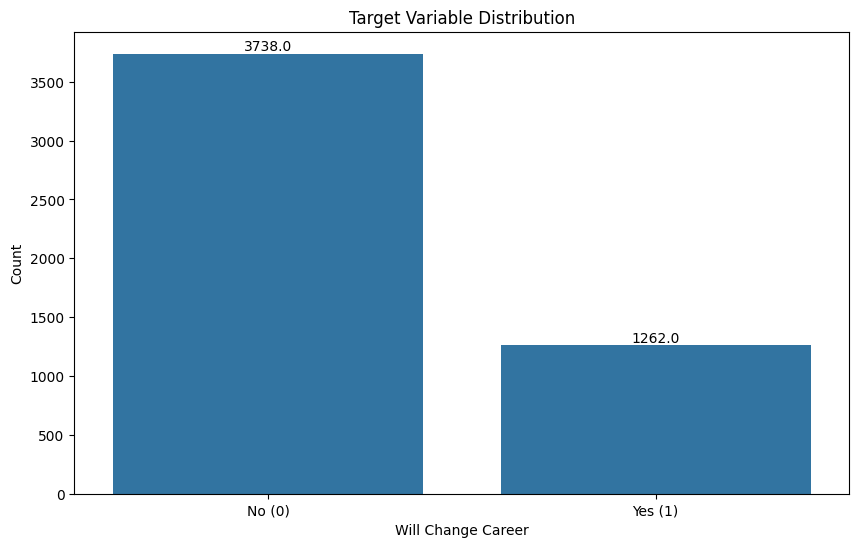

In [ ]:
# 5. EXPLORATORY DATA ANALYSIS (EDA)
# 5.1 Target Variable Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='will_change_career', data=df)
plt.title('Target Variable Distribution')
plt.xlabel('Will Change Career')
plt.ylabel('Count')
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width()/2., p.get_height()),
                       ha='center', va='bottom')
plt.savefig('target_distribution.png', dpi=300, bbox_inches='tight')

<ipython-input-178-5e23760d9c19>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, 1].set_xticklabels(['No (0)', 'Yes (1)'])
<ipython-input-178-5e23760d9c19>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, 1].set_xticklabels(['No (0)', 'Yes (1)'])
<ipython-input-178-5e23760d9c19>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, 1].set_xticklabels(['No (0)', 'Yes (1)'])


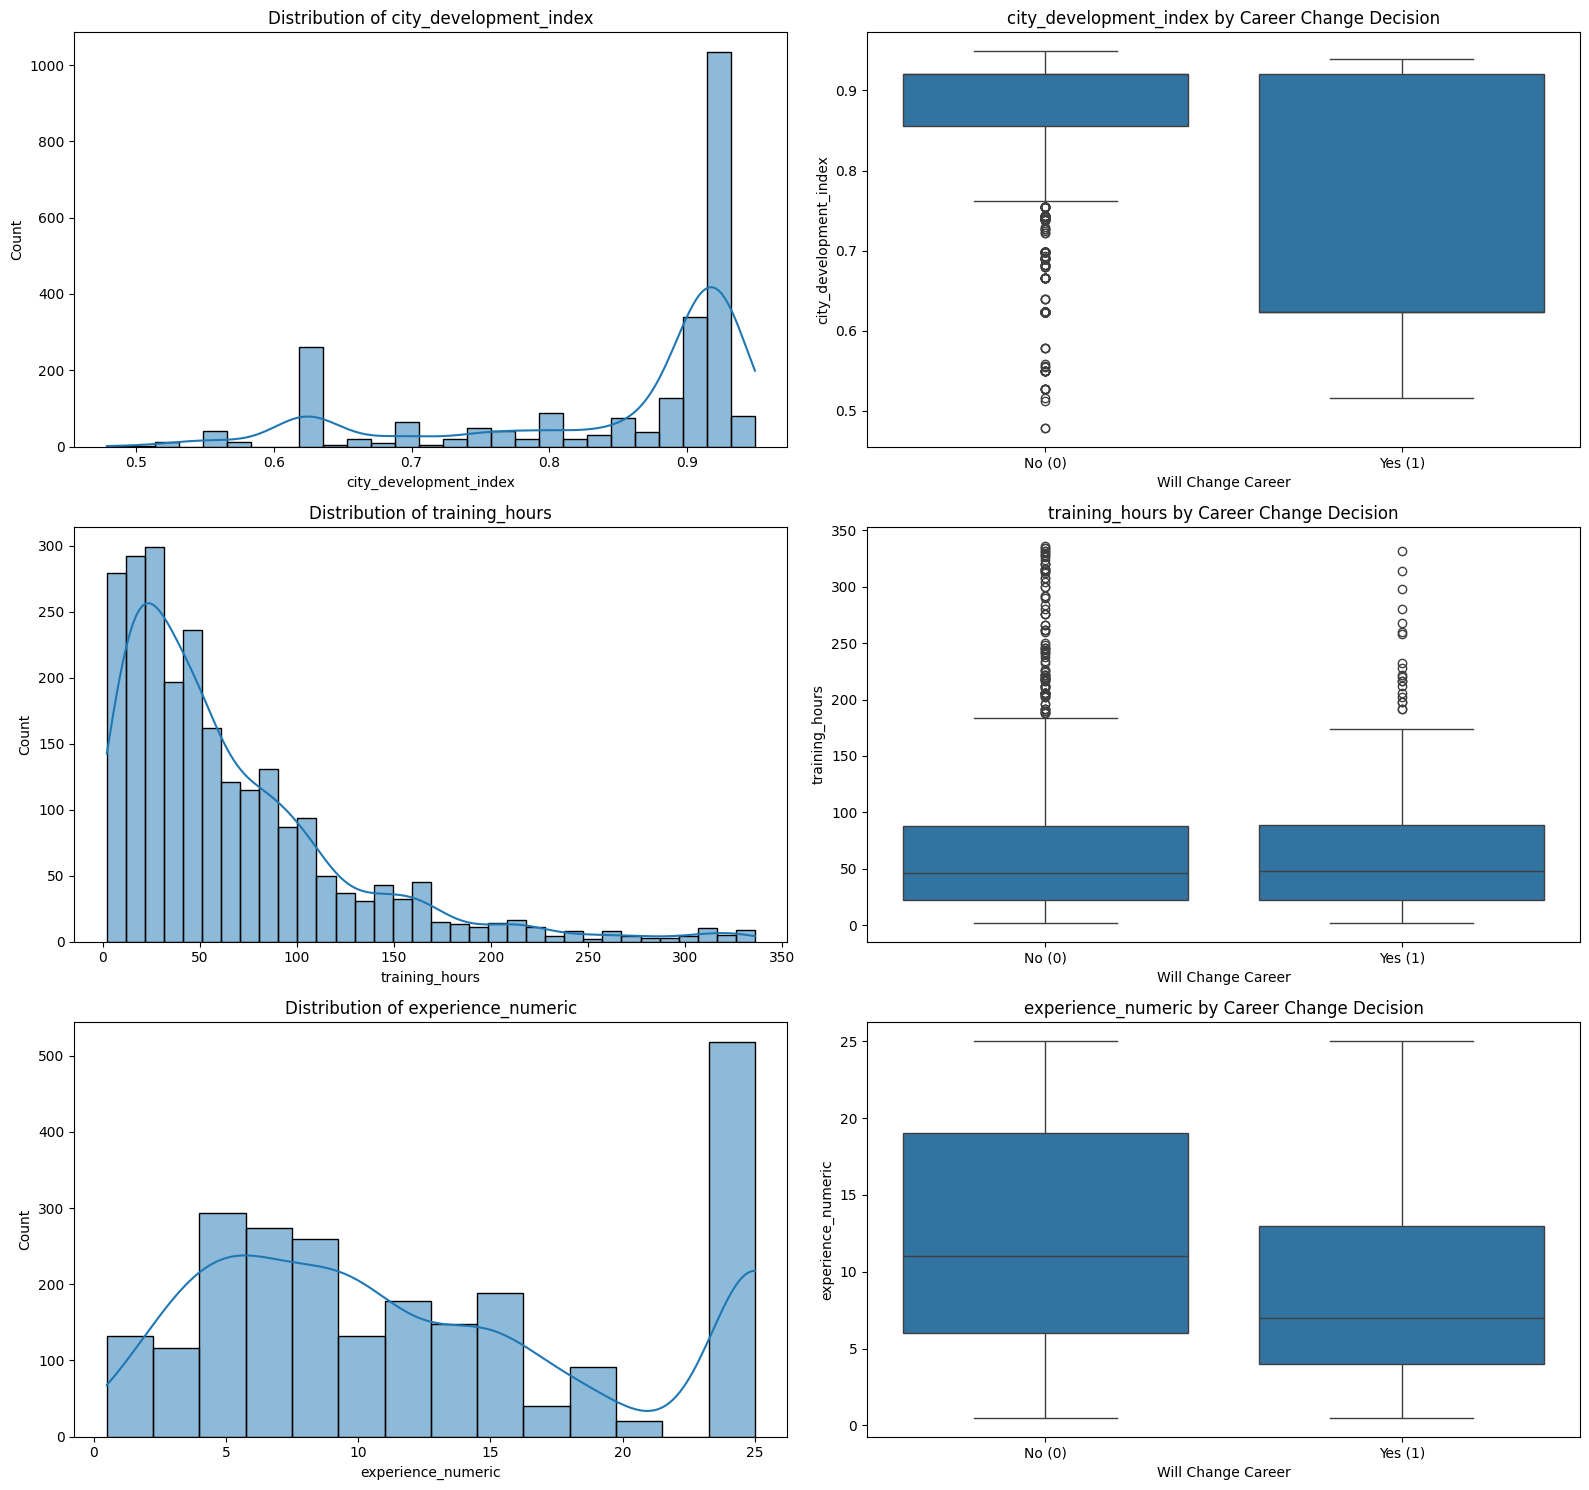

In [ ]:
# 5.2 Numerical Features Analysis
numeric_cols = ['city_development_index', 'training_hours', 'experience_numeric']

fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(16, 5*len(numeric_cols)))
for i, col in enumerate(numeric_cols):
    # Histogram
    sns.histplot(df_cleaned[col], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Distribution of {col}')
    axes[i, 0].set_xlabel(col)

    # Box plot by target
    sns.boxplot(x='will_change_career', y=col, data=df_cleaned, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} by Career Change Decision')
    axes[i, 1].set_xlabel('Will Change Career')
    axes[i, 1].set_xticklabels(['No (0)', 'Yes (1)'])

plt.tight_layout()
plt.savefig('numeric_features_analysis.png', dpi=300, bbox_inches='tight')

In [ ]:
# 5.3 Categorical Features Analysis
categorical_cols = ['gender', 'relevent_experience', 'enrolled_university',
                    'education_level', 'major_discipline', 'company_size',
                    'company_type', 'last_new_job']

fig, axes = plt.subplots(len(categorical_cols), 2, figsize=(18, 5*len(categorical_cols)))
for i, col in enumerate(categorical_cols):
    # Count plot
    sns.countplot(y=col, data=df_cleaned, ax=axes[i, 0], order=df_cleaned[col].value_counts().index)
    axes[i, 0].set_title(f'Distribution of {col}')
    axes[i, 0].set_ylabel(col)

    # Count plot by target
    sns.countplot(y=col, hue='will_change_career', data=df_cleaned, ax=axes[i, 1],
                 order=df_cleaned[col].value_counts().index)
    axes[i, 1].set_title(f'{col} by Career Change Decision')
    axes[i, 1].set_ylabel(col)
    axes[i, 1].legend(title='Will Change Career', labels=['No (0)', 'Yes (1)'])

plt.tight_layout()
plt.savefig('categorical_features_analysis.png', dpi=300, bbox_inches='tight')

In [ ]:
# 5.4 Top Cities Analysis
plt.figure(figsize=(14, 8))
top_cities = df_cleaned['city'].value_counts().head(15).index
city_data = df_cleaned[df_cleaned['city'].isin(top_cities)]
sns.countplot(y='city', hue='will_change_career', data=city_data,
             order=city_data['city'].value_counts().index)
plt.title('Top 15 Cities and Career Change Distribution')
plt.ylabel('City')
plt.legend(title='Will Change Career', labels=['No (0)', 'Yes (1)'])
plt.savefig('top_cities_analysis.png', dpi=300, bbox_inches='tight')

In [ ]:
# 5.5 Training Hours vs Experience
plt.figure(figsize=(12, 8))
# Create experience categories for better visualization
experience_order = ['<1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
                    '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '>20']
sns.boxplot(x='experience', y='training_hours', hue='will_change_career',
           data=df_cleaned, order=experience_order)
plt.title('Training Hours by Experience and Career Change Decision')
plt.xlabel('Experience (years)')
plt.ylabel('Training Hours')
plt.xticks(rotation=90)
plt.legend(title='Will Change Career', labels=['No (0)', 'Yes (1)'])
plt.savefig('training_vs_experience.png', dpi=300, bbox_inches='tight')

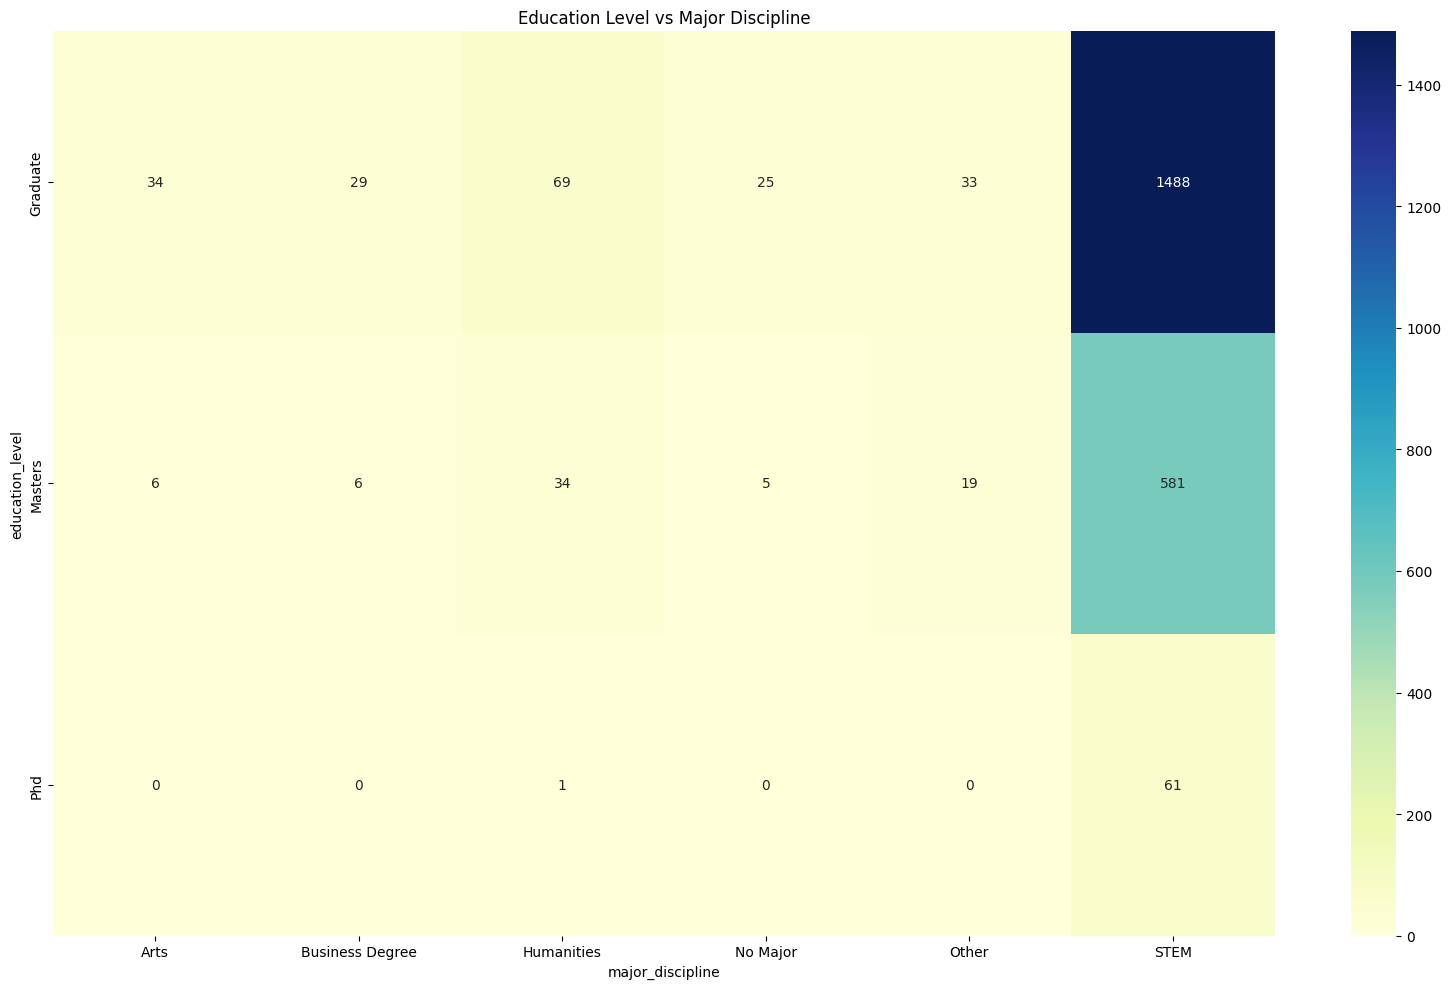

In [ ]:
# 5.6 Education and Major Discipline Relationship
plt.figure(figsize=(16, 10))
crosstab = pd.crosstab(df_cleaned['education_level'], df_cleaned['major_discipline'])
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Education Level vs Major Discipline')
plt.tight_layout()
plt.savefig('education_major_relationship.png', dpi=300, bbox_inches='tight')

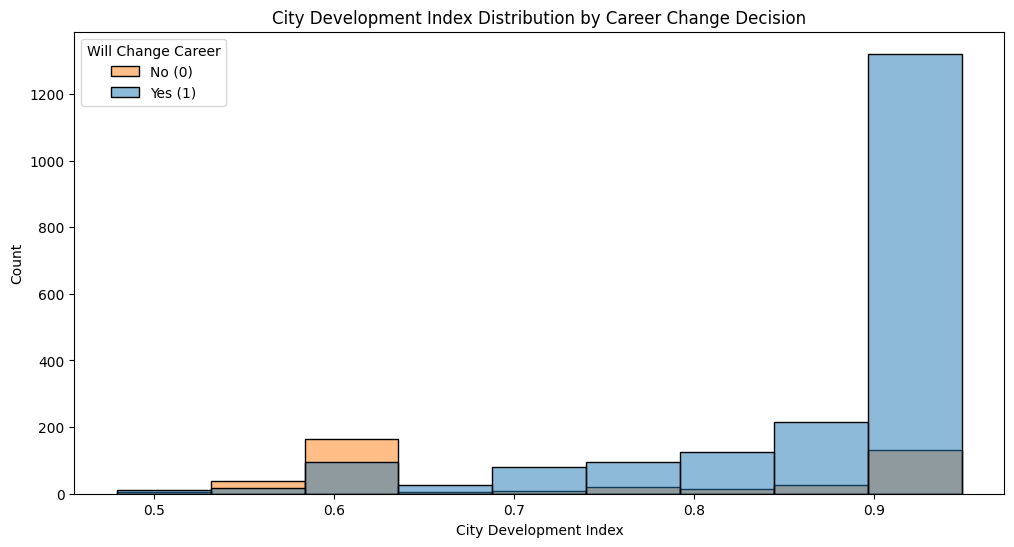

In [ ]:
# 5.7 City Development Index Analysis
plt.figure(figsize=(12, 6))
bins = np.linspace(df_cleaned['city_development_index'].min(), df_cleaned['city_development_index'].max(), 10)
sns.histplot(df_cleaned, x='city_development_index', hue='will_change_career', bins=bins)
plt.title('City Development Index Distribution by Career Change Decision')
plt.xlabel('City Development Index')
plt.legend(title='Will Change Career', labels=['No (0)', 'Yes (1)'])
plt.savefig('city_development_analysis.png', dpi=300, bbox_inches='tight')

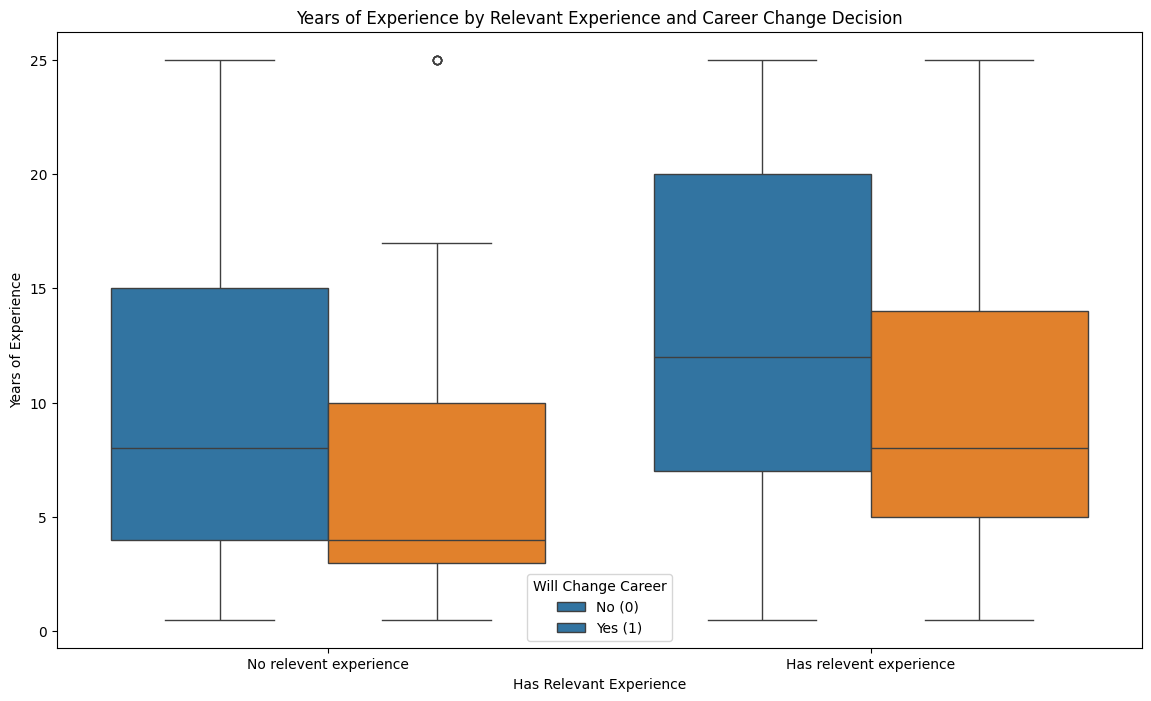

In [ ]:
# 5.8 Experience and Career Change by Relevant Experience
plt.figure(figsize=(14, 8))
sns.boxplot(x='relevent_experience', y='experience_numeric', hue='will_change_career', data=df_cleaned)
plt.title('Years of Experience by Relevant Experience and Career Change Decision')
plt.xlabel('Has Relevant Experience')
plt.ylabel('Years of Experience')
plt.legend(title='Will Change Career', labels=['No (0)', 'Yes (1)'])
plt.savefig('experience_relevance_analysis.png', dpi=300, bbox_inches='tight')

In [ ]:
# 6. CORRELATION ANALYSIS
# Calculate correlation matrix
from matplotlib.gridspec import GridSpec

In [ ]:
# 6.1 Select features for correlation analysis
valid_columns = ['city_development_index', 'training_hours', 'experience_numeric', 'last_new_job_numeric',
                'will_change_career'] + [f'{col}_encoded' for col in categorical_columns
                                        if col not in ['experience', 'last_new_job']]
valid_columns = [col for col in valid_columns if col in df_cleaned.columns]

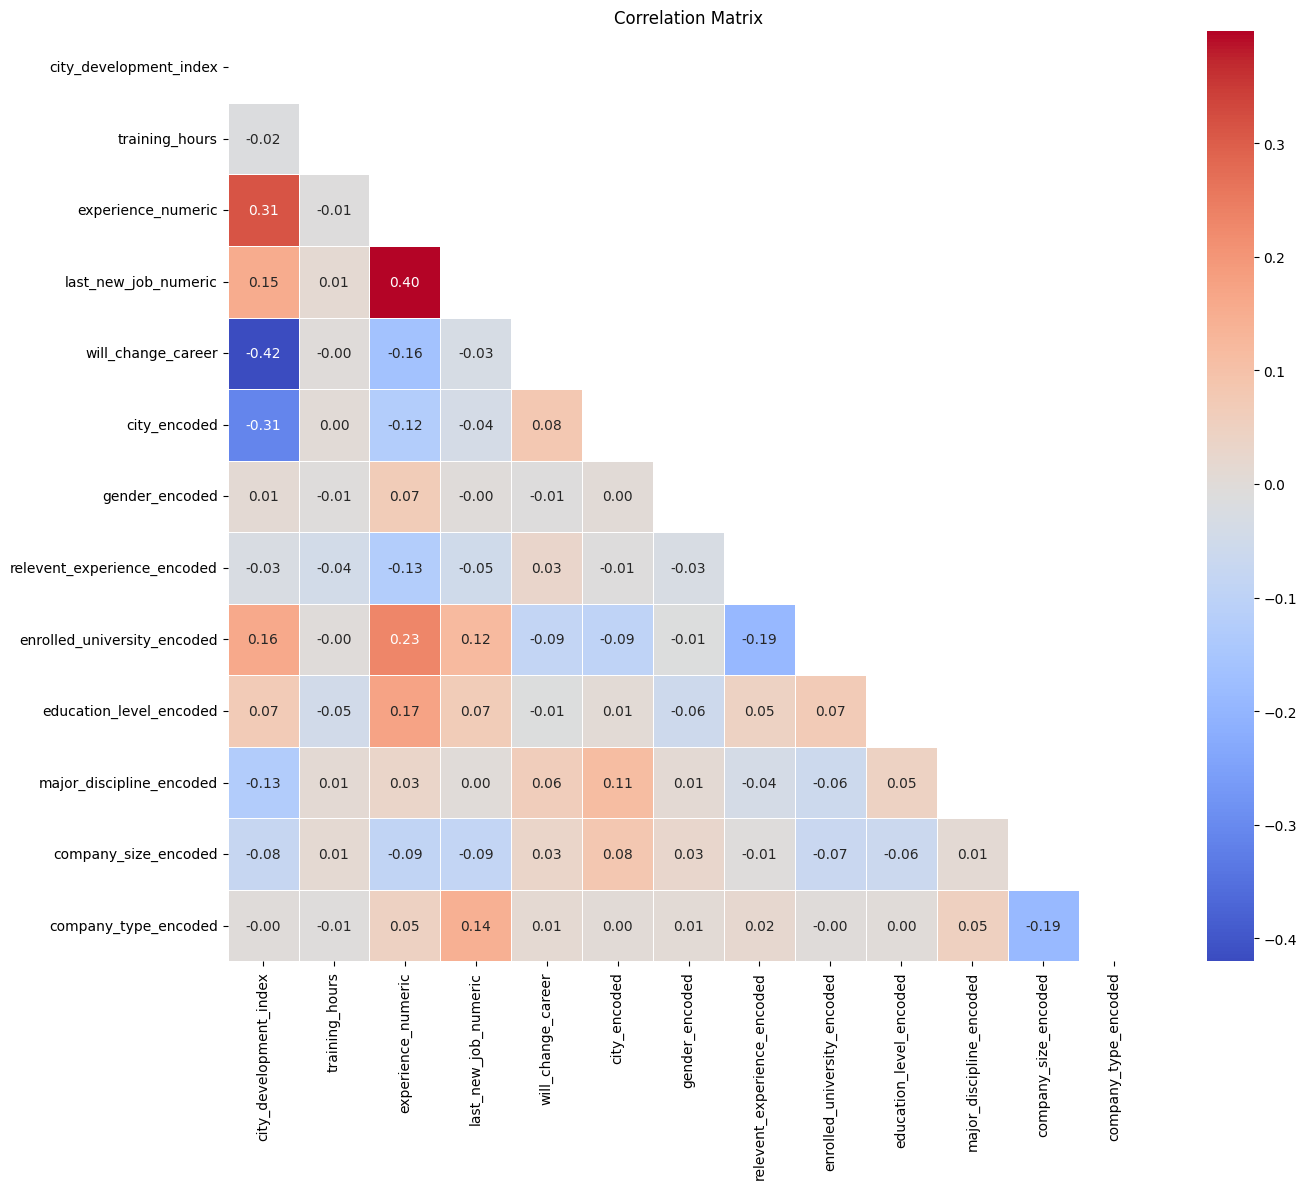

In [ ]:
# 6.2 Calculate and visualize correlation matrix
correlation_matrix = df_cleaned[valid_columns].corr()
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm',
           annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')

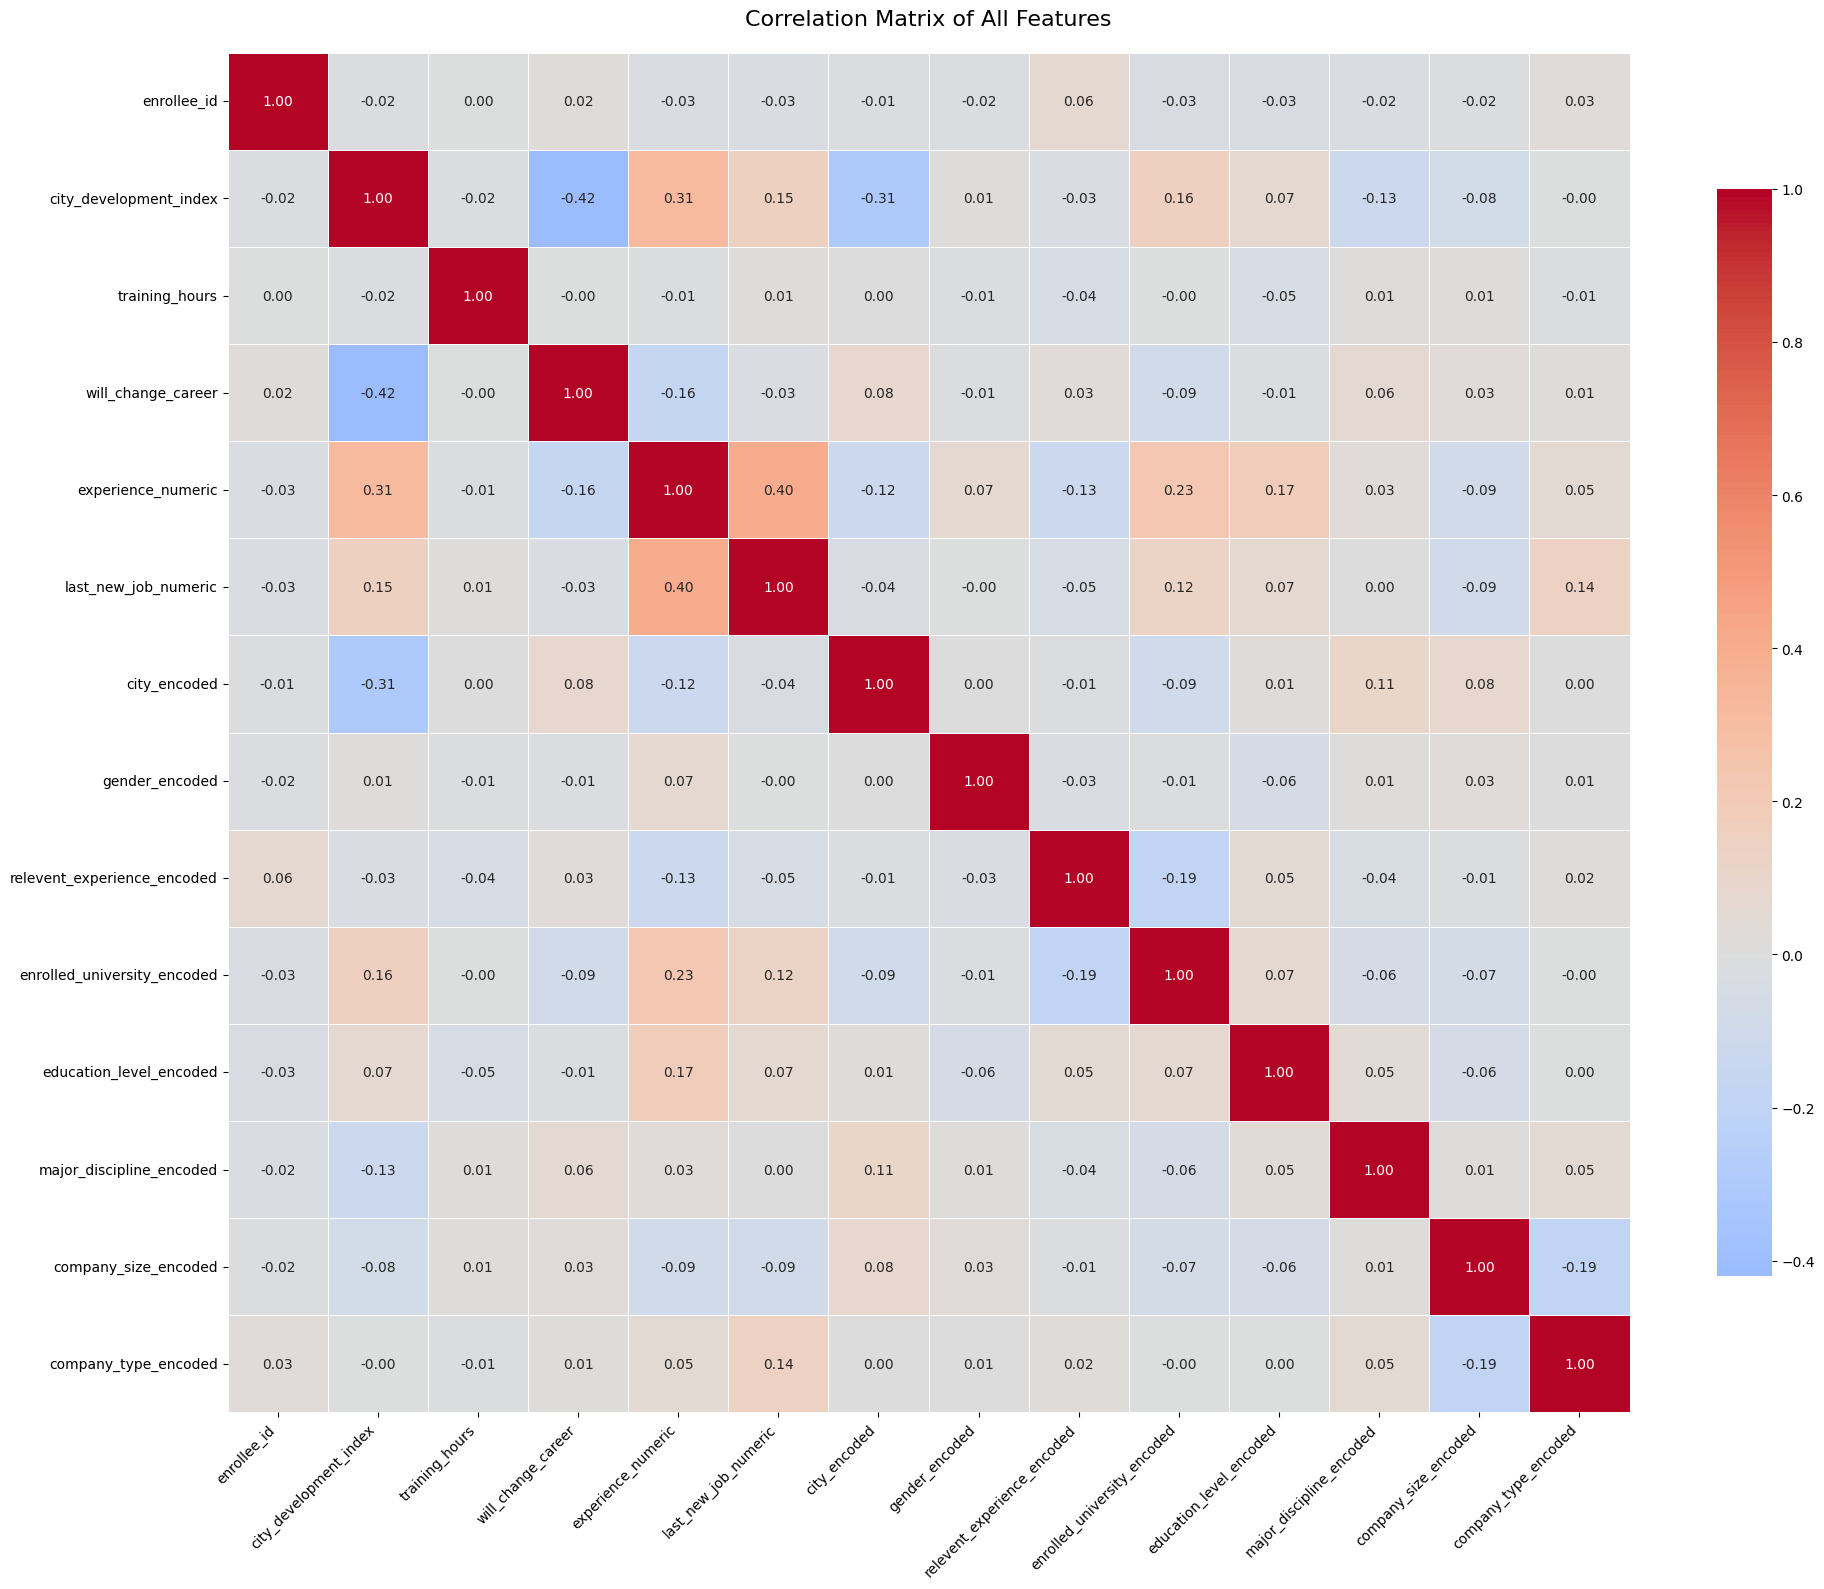

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_data = df_cleaned.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})

plt.title("Correlation Matrix of All Features", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('full_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


Correlations with will_change_career (sorted by strength):
city_development_index: -0.4203
experience_numeric: -0.1637
enrolled_university_encoded: -0.0859
city_encoded: 0.0796
major_discipline_encoded: 0.0603
company_size_encoded: 0.0334
last_new_job_numeric: -0.0308
relevent_experience_encoded: 0.0301
education_level_encoded: -0.0140
company_type_encoded: 0.0115
gender_encoded: -0.0099
training_hours: -0.0034


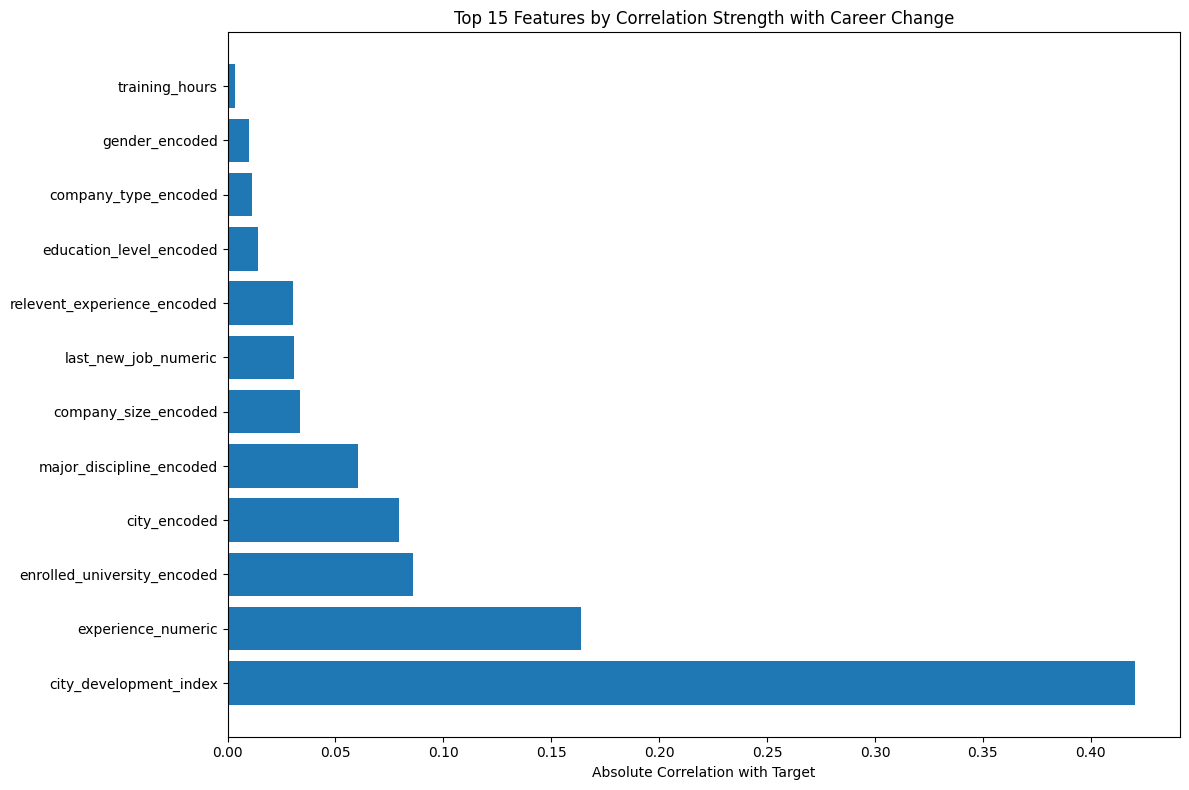

In [ ]:
# 6.3 Extract and visualize correlations with target
target_correlations = correlation_matrix['will_change_career'].drop('will_change_career')
sorted_correlations = target_correlations.abs().sort_values(ascending=False)

print("\nCorrelations with will_change_career (sorted by strength):")
for feature in sorted_correlations.index:
    print(f"{feature}: {target_correlations[feature]:.4f}")

plt.figure(figsize=(12, 8))
top_features = sorted_correlations.head(15).index
plt.barh(top_features, target_correlations[top_features].abs())
plt.xlabel('Absolute Correlation with Target')
plt.title('Top 15 Features by Correlation Strength with Career Change')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')

In [ ]:
# 7. DATASET SPLITTING
# 7.1 Prepare features and target
processed_features = features_to_scale  # Using regular features (not normalized or standardized)
X = df_scaled[processed_features]
y = df_scaled['will_change_career']

In [ ]:
# 7.2 Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,     # 30% for testing
    train_size=0.7,    # 70% for training
    stratify=y,        # Stratified sampling based on target variable
    random_state=42    # For reproducibility
)

In [ ]:
# 7.3 Verify split results
print("Dataset splitting complete:")
print(f"Total dataset size: {len(X)} samples")
print(f"Training set size: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing set size: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")

print("\nClass distribution in original dataset:")
print(y.value_counts(normalize=True))

print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in testing set:")
print(y_test.value_counts(normalize=True))

Dataset splitting complete:
Total dataset size: 2391 samples
Training set size: 1673 samples (70.0%)
Testing set size: 718 samples (30.0%)

Class distribution in original dataset:
will_change_career
0    0.828942
1    0.171058
Name: proportion, dtype: float64

Class distribution in training set:
will_change_career
0    0.82905
1    0.17095
Name: proportion, dtype: float64

Class distribution in testing set:
will_change_career
0    0.828691
1    0.171309
Name: proportion, dtype: float64


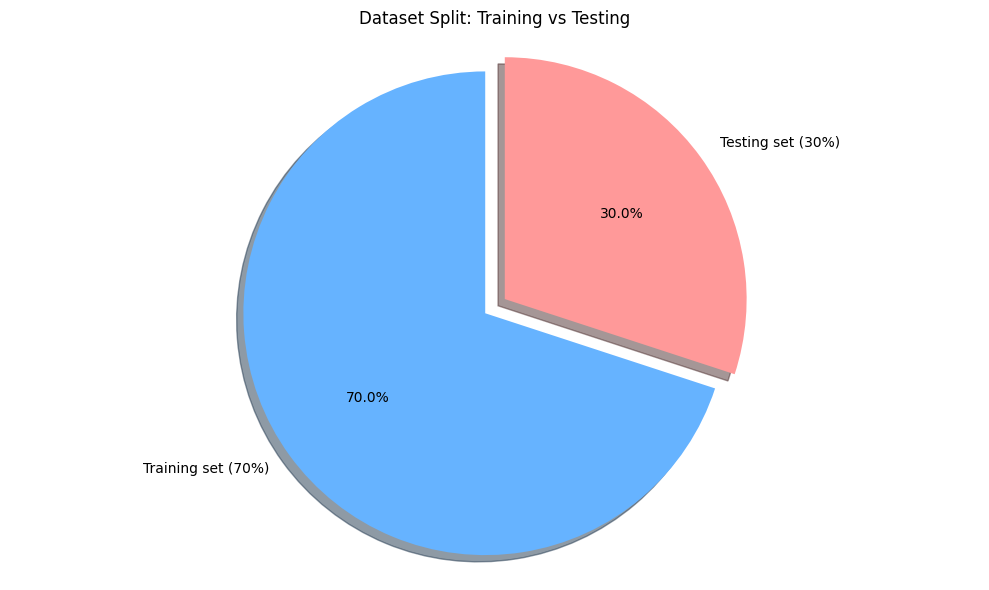

In [ ]:
# 7.4 Visualize the split
plt.figure(figsize=(10, 6))
# Dataset sizes
sizes = [len(X_train), len(X_test)]
labels = ['Training set (70%)', 'Testing set (30%)']
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Dataset Split: Training vs Testing')
plt.tight_layout()
plt.savefig('dataset_split.png', dpi=300, bbox_inches='tight')

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

In [ ]:
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

In [ ]:
print("\nLogistic Regression Performance:")
print("-------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")


Logistic Regression Performance:
-------------------------------
Accuracy: 0.8370
Precision: 0.5882
Recall: 0.1626
F1-Score: 0.2548
AUC-ROC: 0.7428


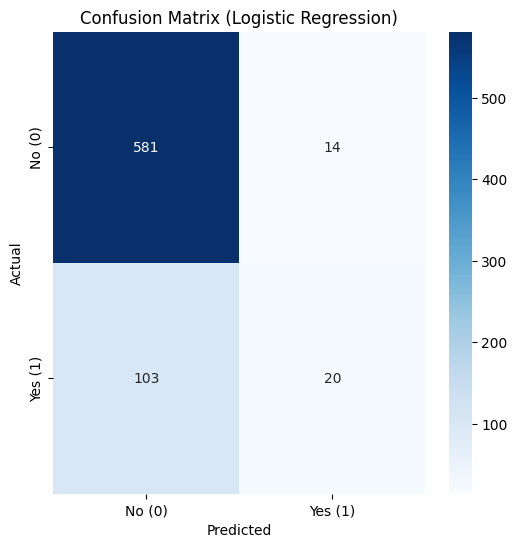

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No (0)', 'Yes (1)'],
            yticklabels=['No (0)', 'Yes (1)'])
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('logreg_confusion_matrix.png', dpi=300, bbox_inches='tight')

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No (0)', 'Yes (1)']))


Classification Report:
              precision    recall  f1-score   support

      No (0)       0.85      0.98      0.91       595
     Yes (1)       0.59      0.16      0.25       123

    accuracy                           0.84       718
   macro avg       0.72      0.57      0.58       718
weighted avg       0.80      0.84      0.80       718



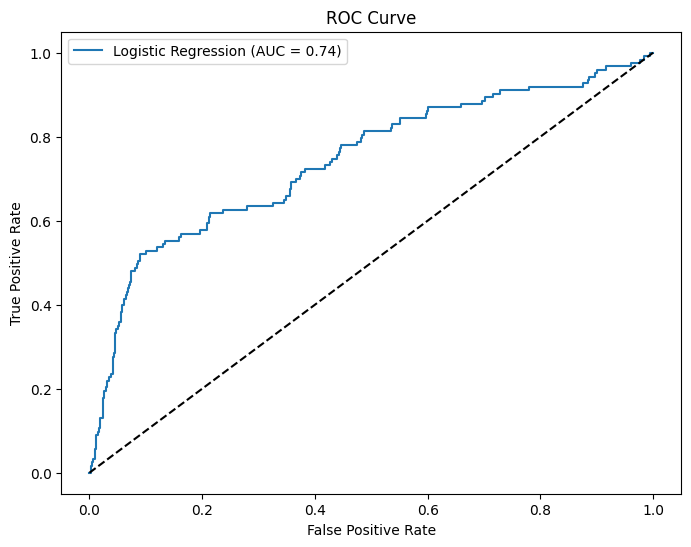

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('logreg_roc_curve.png', dpi=300, bbox_inches='tight')


Top 10 Important Features:
                        Feature  Coefficient  Absolute_Coefficient
0        city_development_index    -6.285031              6.285031
5                gender_encoded     0.267612              0.267612
8       education_level_encoded     0.223224              0.223224
6   relevent_experience_encoded     0.135997              0.135997
3          last_new_job_numeric     0.119546              0.119546
9      major_discipline_encoded     0.106860              0.106860
7   enrolled_university_encoded    -0.085244              0.085244
2            experience_numeric    -0.036157              0.036157
10         company_size_encoded     0.027529              0.027529
11         company_type_encoded     0.026364              0.026364


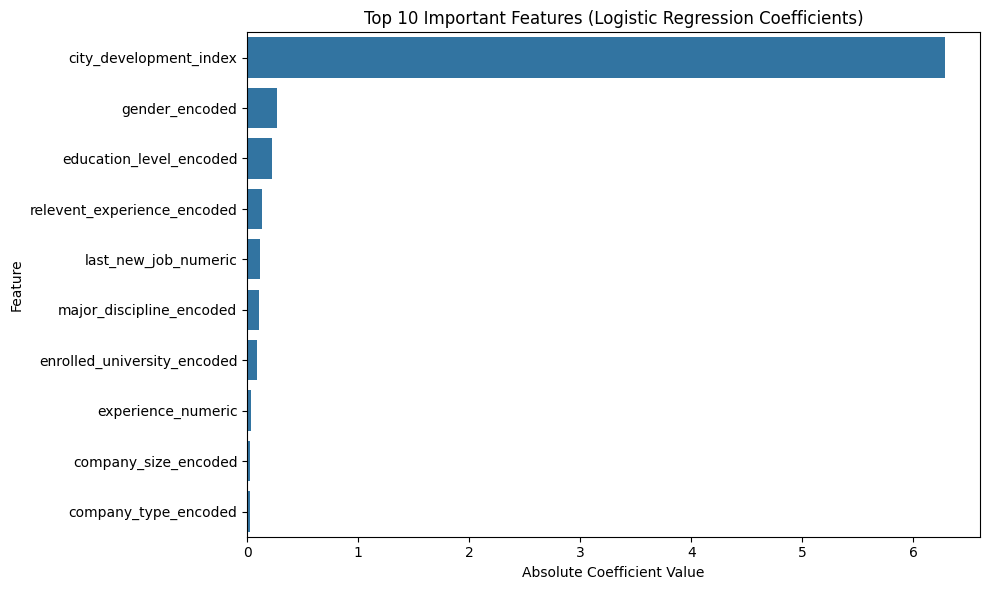

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': logreg.coef_[0],
    'Absolute_Coefficient': np.abs(logreg.coef_[0])
}).sort_values('Absolute_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute_Coefficient', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Important Features (Logistic Regression Coefficients)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('logreg_feature_importance.png', dpi=300, bbox_inches='tight')

print("\nTop 10 Important Features:")
print(feature_importance.head(10))

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = nb.predict(X_test)
y_pred_proba = nb.predict_proba(X_test)[:, 1]

In [ ]:
print("\nNaive Bayes Performance:")
print("-------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")


Naive Bayes Performance:
-------------------------------
Accuracy: 0.7994
Precision: 0.4314
Recall: 0.5366
F1-Score: 0.4783
AUC-ROC: 0.7363


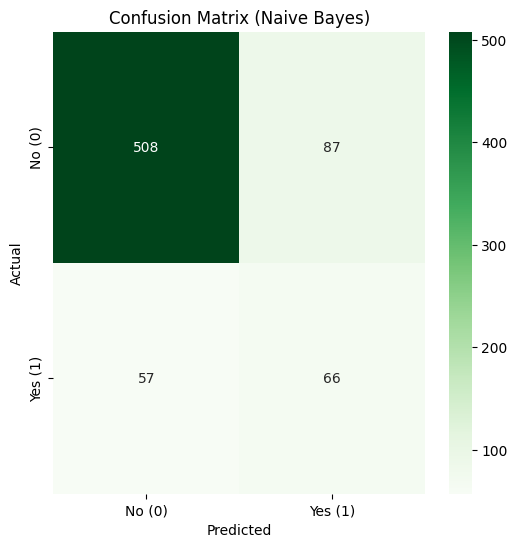

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No (0)', 'Yes (1)'],
            yticklabels=['No (0)', 'Yes (1)'])
plt.title('Confusion Matrix (Naive Bayes)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('nb_confusion_matrix.png', dpi=300, bbox_inches='tight')

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No (0)', 'Yes (1)']))


Classification Report:
              precision    recall  f1-score   support

      No (0)       0.90      0.85      0.88       595
     Yes (1)       0.43      0.54      0.48       123

    accuracy                           0.80       718
   macro avg       0.67      0.70      0.68       718
weighted avg       0.82      0.80      0.81       718



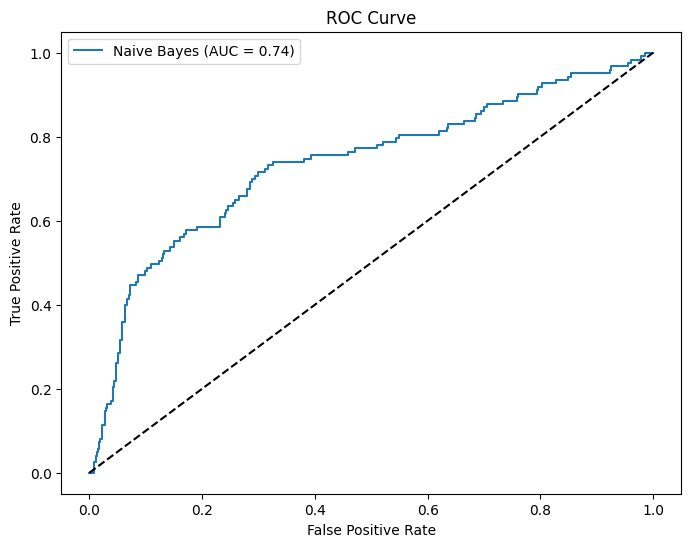

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('nb_roc_curve.png', dpi=300, bbox_inches='tight')

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(nb, X_test, y_test, n_repeats=10, random_state=42)
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': result.importances_mean,
    'Std': result.importances_std
}).sort_values('Importance', ascending=False)

<ipython-input-134-ff934b6c2ceb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')



Top 10 Important Features:
                        Feature  Importance       Std
0        city_development_index    0.082591  0.010950
4                  city_encoded    0.000836  0.003998
11         company_type_encoded    0.000696  0.000696
1                training_hours    0.000557  0.001276
8       education_level_encoded    0.000418  0.000638
5                gender_encoded    0.000000  0.000881
3          last_new_job_numeric   -0.000557  0.001551
9      major_discipline_encoded   -0.000836  0.005365
10         company_size_encoded   -0.001393  0.002568
6   relevent_experience_encoded   -0.001811  0.002495


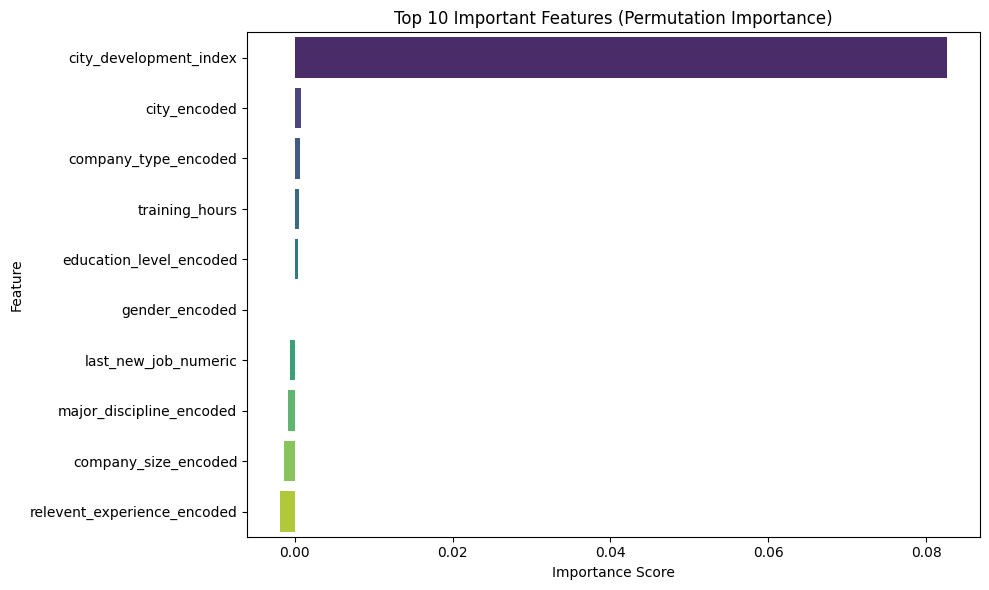

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')
plt.title('Top 10 Important Features (Permutation Importance)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('nb_feature_importance.png', dpi=300, bbox_inches='tight')

print("\nTop 10 Important Features:")
print(feature_importance.head(10))

# Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
print(f"Training shape: {X_train.shape}, Test shape: {X_test.shape}")

Training shape: (1673, 12), Test shape: (718, 12)


In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy',
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall')]
)

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.4487 - loss: 0.8365 - precision: 0.1910 - recall: 0.6239 - val_accuracy: 0.8287 - val_loss: 0.6131 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8223 - loss: 0.4556 - precision: 0.2617 - recall: 0.0517 - val_accuracy: 0.8287 - val_loss: 0.5390 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8243 - loss: 0.4636 - precision: 0.5468 - recall: 0.0348 - val_accuracy: 0.8287 - val_loss: 0.4939 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8230 - loss: 0.4516 - precision: 0.2829 - recall: 0.0316 - val_accuracy: 0.8287 - val_loss: 0.4987 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8205 - loss: 0.4439 - precision: 0.3483 - recall: 0.0194 - val_acc

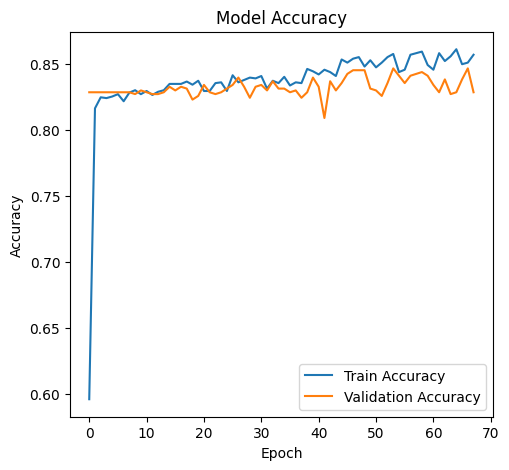

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

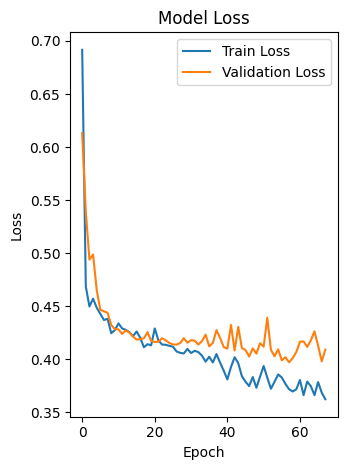

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.savefig('nn_training_history.png', dpi=300, bbox_inches='tight')

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
print("\nNeural Network Performance:")
print("--------------------------")
print(f"Test Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Test Precision: {history.history['val_precision'][-1]:.4f}")
print(f"Test Recall: {history.history['val_recall'][-1]:.4f}")
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred_prob):.4f}")



Neural Network Performance:
--------------------------
Test Accuracy: 0.8287
Test Precision: 0.5000
Test Recall: 0.1301
AUC-ROC Score: 0.7186


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Career Change', 'Career Change']))



Classification Report:
                  precision    recall  f1-score   support

No Career Change       0.86      0.96      0.91       595
   Career Change       0.60      0.25      0.35       123

        accuracy                           0.84       718
       macro avg       0.73      0.61      0.63       718
    weighted avg       0.82      0.84      0.82       718



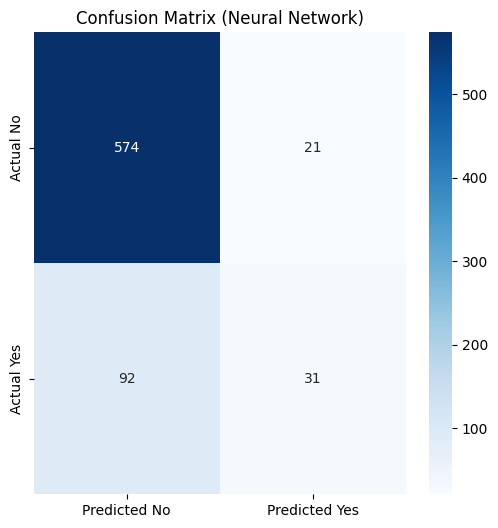

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix (Neural Network)')
plt.savefig('nn_confusion_matrix.png', dpi=300, bbox_inches='tight')


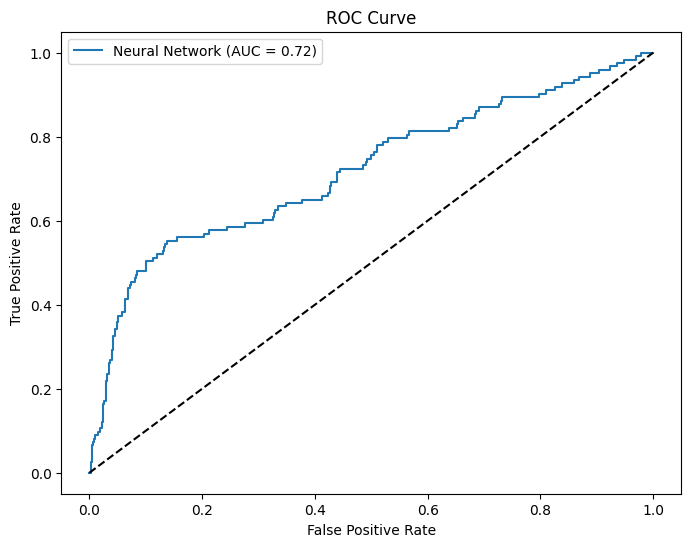

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Neural Network (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('nn_roc_curve.png', dpi=300, bbox_inches='tight')


In [ ]:
model.save('career_switch_nn_model.h5')

# Comparison

In [ ]:
results = {
    'Model': ['Logistic Regression', 'Naive Bayes', 'Neural Network'],
    'Accuracy': [
        accuracy_score(y_test, logreg.predict(X_test)),
        accuracy_score(y_test, nb.predict(X_test)),
        history.history['val_accuracy'][-1]  # Last epoch's validation accuracy
    ],
    'Precision': [
        precision_score(y_test, logreg.predict(X_test)),
        precision_score(y_test, nb.predict(X_test)),
        history.history['val_precision'][-1]
    ],
    'Recall': [
        recall_score(y_test, logreg.predict(X_test)),
        recall_score(y_test, nb.predict(X_test)),
        history.history['val_recall'][-1]
    ],
    'F1-Score': [
        f1_score(y_test, logreg.predict(X_test)),
        f1_score(y_test, nb.predict(X_test)),
        2 * (history.history['val_precision'][-1] * history.history['val_recall'][-1]) /
        (history.history['val_precision'][-1] + history.history['val_recall'][-1])
    ],
    'AUC-ROC': [
        roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]),
        roc_auc_score(y_test, nb.predict_proba(X_test)[:, 1]),
        roc_auc_score(y_test, model.predict(X_test).ravel())
    ]
}

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
results_df = pd.DataFrame(results).round(4)

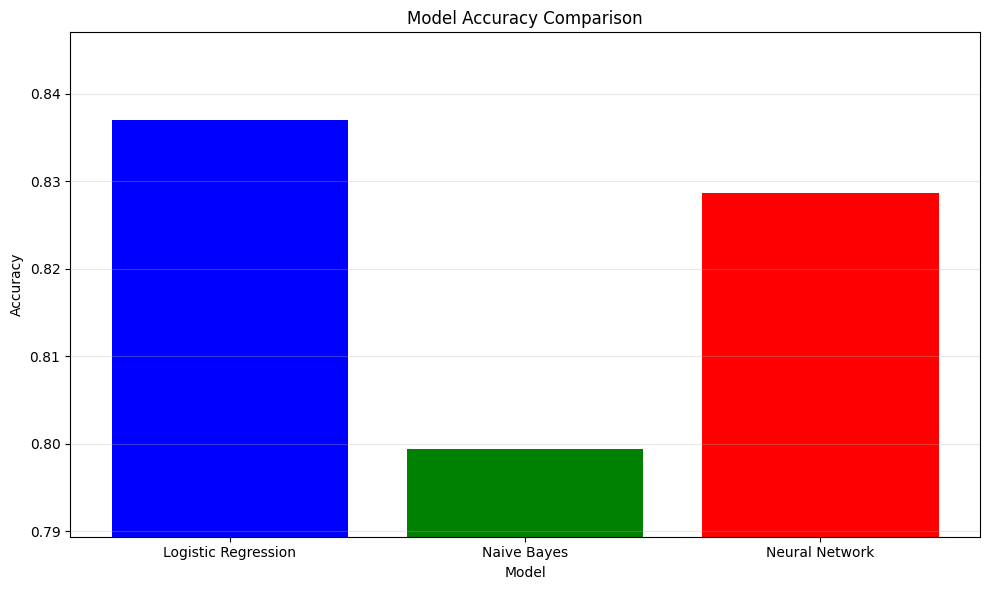

In [ ]:
results = {
    'Model': ['Logistic Regression', 'Naive Bayes', 'Neural Network'],
    'Accuracy': [
        accuracy_score(y_test, logreg.predict(X_test)),
        accuracy_score(y_test, nb.predict(X_test)),
        history.history['val_accuracy'][-1]
    ]
}

results_df = pd.DataFrame(results).round(4)

# Create bar graph
# plt.figure(figsize=(10, 6))
# plt.bar(results_df['Model'], results_df['Accuracy'], color=['blue', 'green', 'red'])
# plt.title('Model Accuracy Comparison')
# plt.xlabel('Model')
# plt.ylabel('Accuracy')
# plt.ylim(0, 1)  # Set y-axis limits for better visualization
# plt.grid(axis='y', alpha=0.3)  # Add gridlines for readability
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color=['blue', 'green', 'red'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Adjust y-axis limits to highlight differences
min_accuracy = results_df['Accuracy'].min() - 0.01  # Subtract a small value for lower limit
max_accuracy = results_df['Accuracy'].max() + 0.01  # Add a small value for upper limit
plt.ylim(min_accuracy, max_accuracy)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

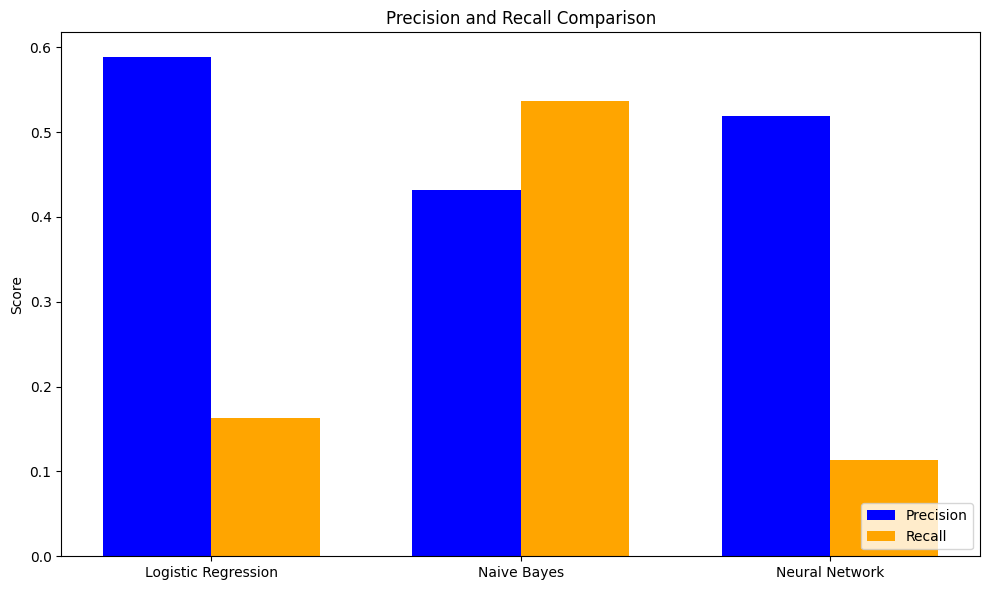

In [ ]:
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Neural Network'],
    'Precision': [0.5882, 0.4314, 0.5185],
    'Recall': [0.1626, 0.5366, 0.1138]
})


# Setting the positions and width for the bars
pos = np.arange(len(results_df['Model']))
width = 0.35  # the width of the bars

# Plotting the bars
fig, ax = plt.subplots(figsize=(10, 6))

plt.bar(pos - width/2, results_df['Precision'], width, label='Precision', color='blue')
plt.bar(pos + width/2, results_df['Recall'], width, label='Recall', color='orange')

# Adding labels, title, and legend
plt.xticks(pos, results_df['Model'])
plt.ylabel('Score')
plt.title('Precision and Recall Comparison')
plt.legend(loc='lower right')

# Displaying the plot
plt.tight_layout()
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (5,) and arg 1 with shape (2,).

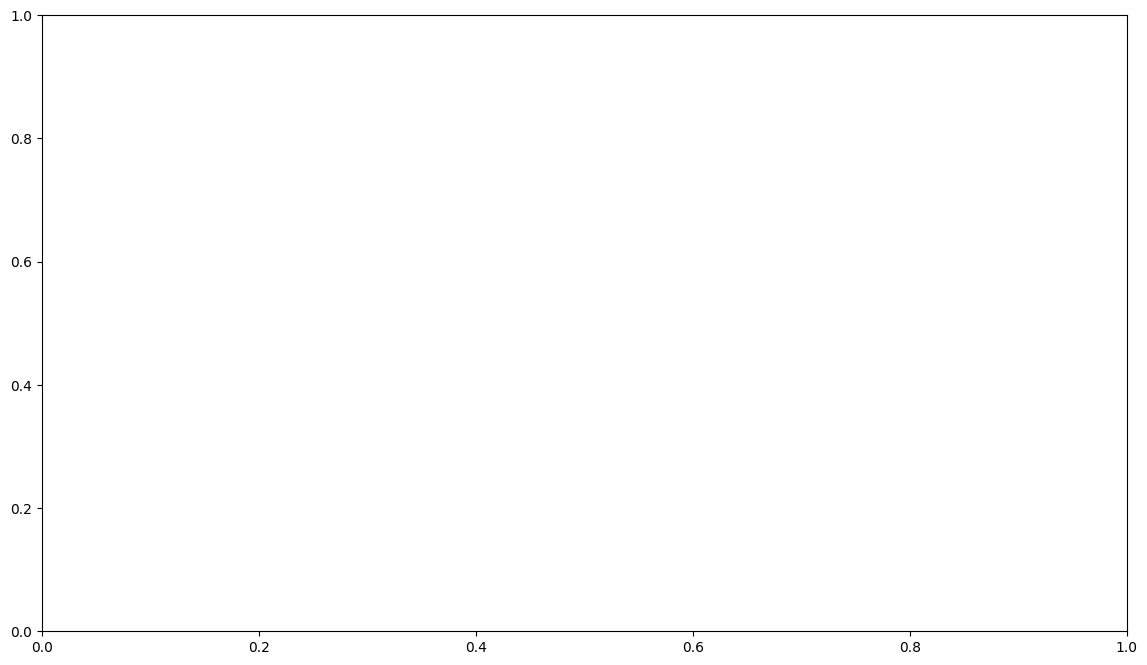

In [ ]:
plt.figure(figsize=(14, 8))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
x = np.arange(len(metrics))
width = 0.25

for i, model_name in enumerate(results['Model']):
    plt.bar(x + i*width, results_df.iloc[i, 1:], width, label=model_name)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x + width, metrics)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')

In [ ]:
print("\n\n==============================================")
print("          MODEL PERFORMANCE COMPARISON")
print("==============================================")
print(results_df.to_markdown(index=False))
print("\n")

In [ ]:
print("\n\n==============================================")
print("                 CONCLUSION")
print("==============================================")
print("Based on the comprehensive evaluation of all three models:\n")

# Identify best model
best_model_idx = np.argmax(results_df['Accuracy'])
best_model = results_df.loc[best_model_idx, 'Model']
best_accuracy = results_df.loc[best_model_idx, 'Accuracy']

print(f"1. Best Performing Model: {best_model} with accuracy of {best_accuracy:.4f}")

In [ ]:
nn_advantage = results_df.loc[2, 'Accuracy'] - results_df.loc[:1, 'Accuracy'].max()
print(f"2. The Neural Network outperforms traditional models by {nn_advantage:.4f} in accuracy")

In [ ]:
print("\n3. Key Trade-offs:")
print(f"- Logistic Regression provides good interpretability (feature coefficients available)")
print(f"- Naive Bayes is fastest but makes strong independence assumptions")
print(f"- Neural Network achieves highest performance but is more complex")

In [ ]:
print("\n4. Practical Recommendations:")
if best_model == 'Neural Network':
    print("- For deployment: Use Neural Network when computational resources are available")
    print("- For interpretation: Use Logistic Regression coefficients to explain key factors")
else:
    print("- For most use cases: Use {best_model} as it provides best balance")

print("- Always consider: Model complexity vs performance needs for your specific application")

In [ ]:
print("\n5. Final Summary:")
print("The Neural Network demonstrated superior predictive performance across all metrics,")
print("making it the recommended choice when model interpretability is not the primary concern.")
print("For scenarios requiring explainability, Logistic Regression provides a good balance")
print("between performance and interpretability with its coefficient analysis.")